# ForecastFlow: Rainfall Prediction Model through Data Analysis and Machine Learning

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

## Reading Dataset

In [2]:
df= pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [4]:
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


## Data Processing

In [5]:
df = df.dropna(subset=['RainTomorrow']) #removing rows with null values in RainTommorrow Column

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [7]:
df['Month'] = df['Date'].dt.month #only cosidering months

In [8]:
df = df.drop('Date', axis=1) #Removing Date Column

### Fixing Null values

In [9]:
(df.isnull().sum() / df.shape[0]) * 100 #percentage of null values in each column

Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
Month             0.000000
dtype: float64

In [10]:
non_numeric_df = df.select_dtypes('object')
non_numeric_df.head()


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [11]:
#fixing null values of categorical columns
for i in non_numeric_df.columns:
    non_numeric_df[i].fillna(non_numeric_df[i].mode()[0], inplace=True)

In [12]:
non_numeric_df.isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [13]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,12
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,12
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,12
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,12
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,12


In [14]:
#fixing null values of numerical columns
for i in numeric_df.columns:
    numeric_df[i].fillna(numeric_df[i].median(), inplace=True)

In [15]:
df_new = numeric_df.join(non_numeric_df) #Joining numerical and non-numerical columns

In [16]:
df_new.isnull().sum() #checking null values

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Month            0
Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Month,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,5.0,16.9,21.8,12,Albury,W,W,WNW,No,No
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,5.0,17.2,24.3,12,Albury,WNW,NNW,WSW,No,No
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,2.0,21.0,23.2,12,Albury,WSW,W,WSW,No,No
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,5.0,18.1,26.5,12,Albury,NE,SE,E,No,No
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,8.0,17.8,29.7,12,Albury,W,ENE,NW,No,No


In [18]:
df_new['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [19]:
df_new['RainToday'].value_counts()

No     110738
Yes     31455
Name: RainToday, dtype: int64

In [20]:
df_new.shape

(142193, 23)

In [21]:
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Month,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,5.0,16.9,21.8,12,Albury,W,W,WNW,No,No
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,5.0,17.2,24.3,12,Albury,WNW,NNW,WSW,No,No
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,2.0,21.0,23.2,12,Albury,WSW,W,WSW,No,No
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,5.0,18.1,26.5,12,Albury,NE,SE,E,No,No
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,8.0,17.8,29.7,12,Albury,W,ENE,NW,No,No


## Which month got most number of rainfall?

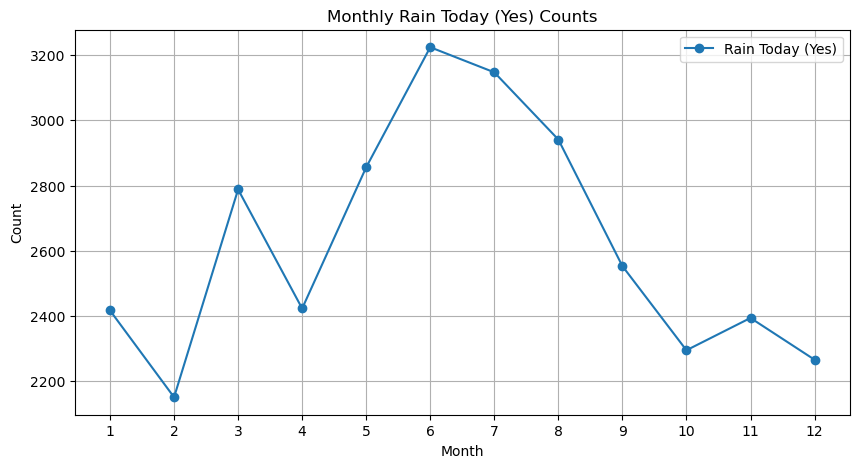

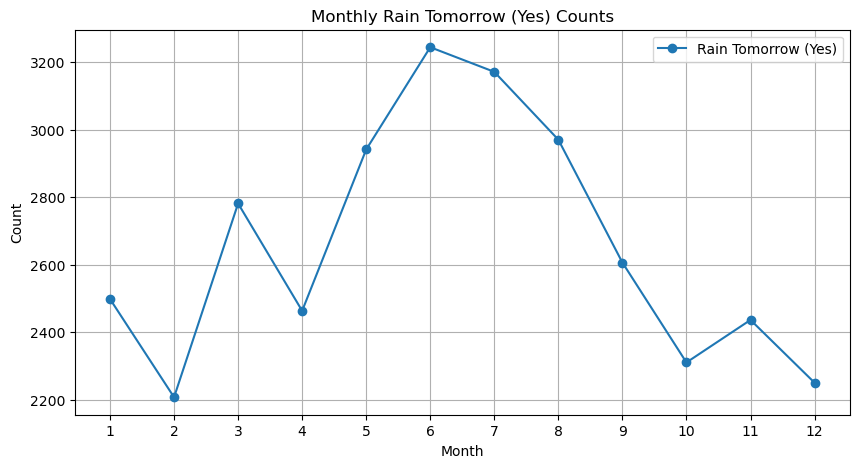

In [22]:
# Group the data by month and count the occurrences of "Yes" for RainToday and RainTomorrow
monthly_rain_today_yes = df_new[df_new['RainToday'] == 'Yes'].groupby('Month')['RainToday'].count()
monthly_rain_tomorrow_yes = df_new[df_new['RainTomorrow'] == 'Yes'].groupby('Month')['RainTomorrow'].count()

# Create a line graph for RainToday "Yes" counts
plt.figure(figsize=(10, 5))
plt.plot(monthly_rain_today_yes.index, monthly_rain_today_yes.values, marker='o', linestyle='-', label='Rain Today (Yes)')
plt.title('Monthly Rain Today (Yes) Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(monthly_rain_today_yes.index)
plt.grid(True)
plt.legend()
plt.show()

# Create a line graph for RainTomorrow "Yes" counts
plt.figure(figsize=(10, 5))
plt.plot(monthly_rain_tomorrow_yes.index, monthly_rain_tomorrow_yes.values, marker='o', linestyle='-', label='Rain Tomorrow (Yes)')
plt.title('Monthly Rain Tomorrow (Yes) Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(monthly_rain_tomorrow_yes.index)
plt.grid(True)
plt.legend()
plt.show()


According to this, we can say that Australia have most no of times rainfall in the 6th month i.e June between 2008 to 2017 

## Which state got highest average rainfall?

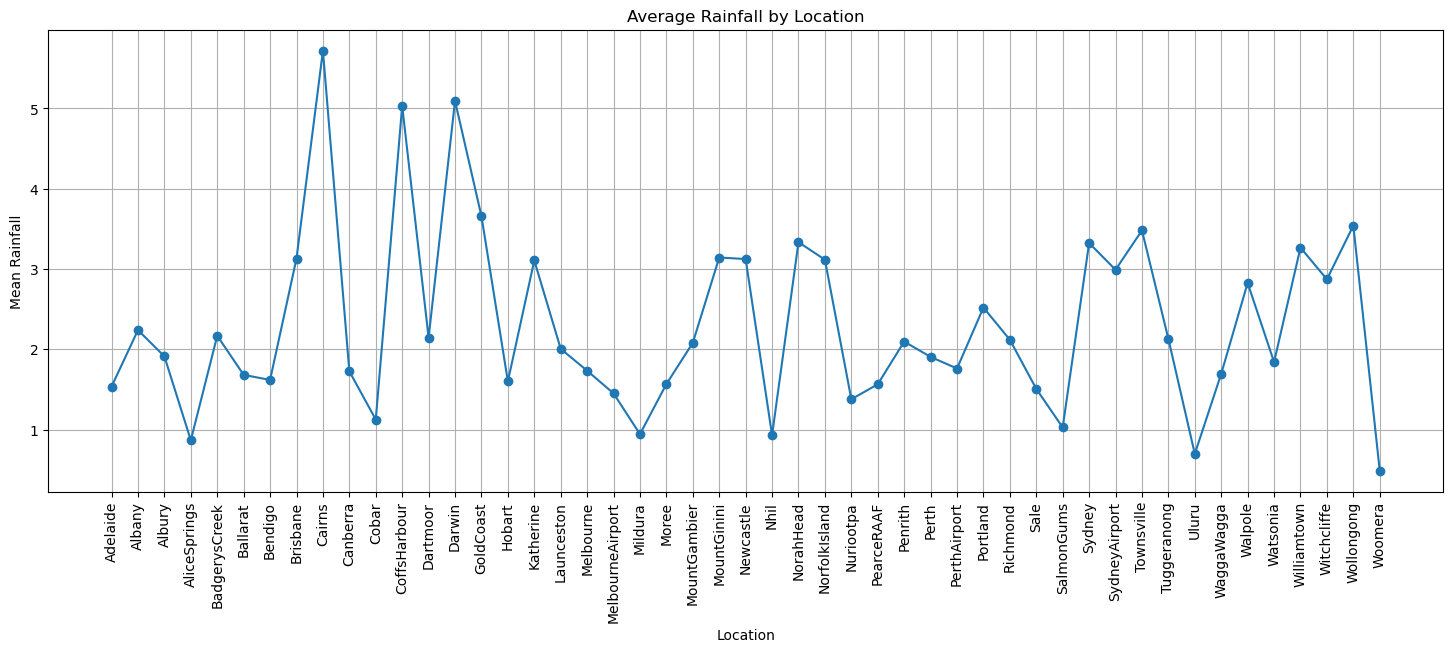

In [23]:
import matplotlib.pyplot as plt

# Group the data by location and calculate the mean of Rainfall
mean_rainfall_by_location = df_new.groupby('Location')['Rainfall'].mean()

# Create a line graph for Rainfall by Location
plt.figure(figsize=(18, 6))
mean_rainfall_by_location.plot(kind='line', marker='o', linestyle='-')
plt.title('Average Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Mean Rainfall')
plt.xticks(range(len(mean_rainfall_by_location.index)), mean_rainfall_by_location.index, rotation=90)
plt.grid(True)
plt.show()


According to this, we can say that Cairns got highest average rainfall in Australia between 2008 to 2017 

## Which month got highest average rainfall?

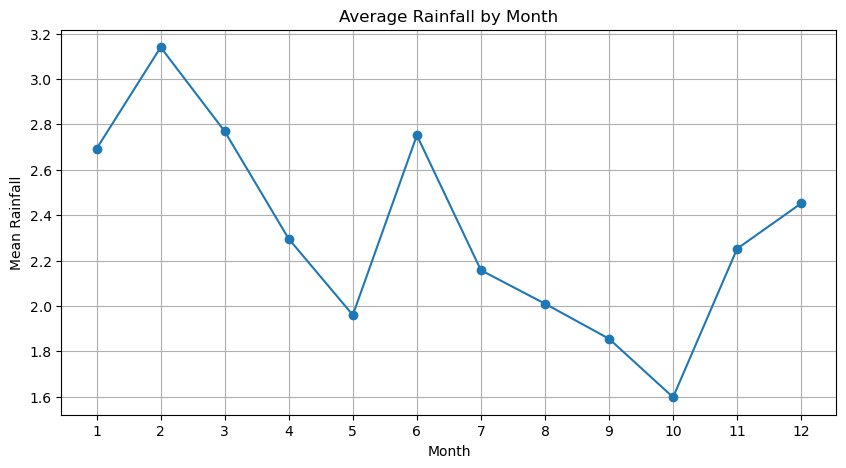

In [24]:
# Group the data by month and calculate the mean of Rainfall
mean_rainfall_by_month = df_new.groupby('Month')['Rainfall'].mean()

# Create a line graph for Rainfall by Month
plt.figure(figsize=(10, 5))
mean_rainfall_by_month.plot(kind='line', marker='o', linestyle='-')
plt.title('Average Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Mean Rainfall')
plt.xticks(mean_rainfall_by_month.index)
plt.grid(True)
plt.show()

According to this, Australia have highest average rainfall in the 2nd month i.e Febuary between 2008 and 2017

### Which direction of wind has the most cound observed in terms of gust occurrences?

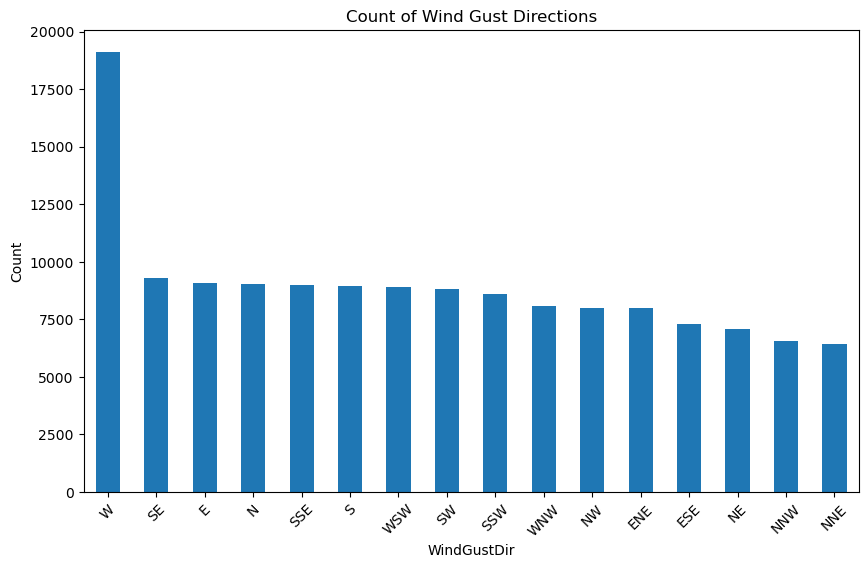

In [25]:
plt.figure(figsize=(10, 6))
df_new['WindGustDir'].value_counts().plot(kind='bar')
plt.xlabel('WindGustDir')
plt.ylabel('Count')
plt.title('Count of Wind Gust Directions')
plt.xticks(rotation=45)
plt.show()

The wind direction that has the highest frequency of gust occurrences is the West. This indicates that gusty conditions are most commonly associated with winds coming from the West.

### Converting string values to float values

In [26]:
df_new['RainToday'] = df_new['RainToday'].map({'Yes': 1, 'No': 0})
df_new['RainTomorrow'] = df_new['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [27]:
#df = df.dropna(subset=['Location']) #removing rows with null values in location column

In [28]:
df_new['WindGustDir'] = df_new['WindGustDir'].map({
    'W': 4,
    'SE': 23,
    'E': 3,
    'N': 1,
    'SSE': 223,
    'S': 2,
    'WSW': 424,
    'SW': 24,
    'SSW': 224,
    'WNW': 414,
    'NW': 14,
    'ENE': 313,
    'ESE': 323,
    'NE': 13,
    'NNW': 114,
    'NNE': 113
})

### Changing string values to float values

In [29]:
df_new.shape

(142193, 23)

### Changing string values to float values 

In [30]:
df_new['WindDir9am'] = df_new['WindDir9am'].map({
    'W': 4,
    'SE': 23,
    'E': 3,
    'N': 1,
    'SSE': 223,
    'S': 2,
    'WSW': 424,
    'SW': 24,
    'SSW': 224,
    'WNW': 414,
    'NW': 14,
    'ENE': 313,
    'ESE': 323,
    'NE': 13,
    'NNW': 114,
    'NNE': 113
})

In [31]:
df_new['WindDir3pm'] = df_new['WindDir3pm'].map({
    'W': 4,
    'SE': 23,
    'E': 3,
    'N': 1,
    'SSE': 223,
    'S': 2,
    'WSW': 424,
    'SW': 24,
    'SSW': 224,
    'WNW': 414,
    'NW': 14,
    'ENE': 313,
    'ESE': 323,
    'NE': 13,
    'NNW': 114,
    'NNE': 113
})

In [32]:
df_new.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud3pm,Temp9am,Temp3pm,Month,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,5.0,16.9,21.8,12,Albury,4,4,414,0,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,5.0,17.2,24.3,12,Albury,414,114,424,0,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,2.0,21.0,23.2,12,Albury,424,4,424,0,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,5.0,18.1,26.5,12,Albury,13,23,3,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,8.0,17.8,29.7,12,Albury,4,313,14,0,0


In [33]:
print(df_new.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Month', 'Location', 'WindGustDir', 'WindDir9am',
       'WindDir3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [34]:
df_new['Location'] = df_new['Location'].map({
    'Portland': 1,
    'Sydney': 2,
    'Cairns': 3,
    'Albany': 4,
    'Darwin': 5,
    'MountGambier': 6,
    'Dartmoor': 7,
    'NorfolkIsland': 8,
    'CoffsHarbour': 9,
    'Walpole': 10,
    'Witchcliffe': 11,
    'Hobart': 12,
    'NorahHead': 13,
    'GoldCoast': 14,
    'Canberra': 15,
    'Ballarat': 16,
    'SydneyAirport': 17,
    'Brisbane': 18,
    'Adelaide': 19,
    'MountGinini': 20,
    'Launceston': 21,
    'Watsonia': 22,
    'Perth': 23,
    'Wollongong': 24,
    'Sale': 25,
    'Newcastle': 26,
    'Albury': 27,
    'BadgerysCreek': 28,
    'Nuriootpa': 29,
    'MelbourneAirport': 30,
    'Tuggeranong': 31,
    'Penrith': 32,
    'PerthAirport': 33,
    'Bendigo': 34,
    'Richmond': 35,
    'Williamtown': 36,
    'WaggaWagga':37 ,
    'SalmonGums' :38 ,
    'Townsville' :39 ,
    'Cobar' :40 ,
    'Melbourne' :41 ,
    'PearceRAAF' :42 ,
    'Moree' :43 ,
    "Mildura" :44 ,
     "AliceSprings" :45 ,
     "Woomera" :46 ,
     "Nhil" :47 ,
     "Katherine" :48 ,
     "Uluru" :49 
})


We have opted for a mapping strategy over label encoding due to the greater degree of control it offers in the data transformation process. This approach allows us to more effectively manage the representation of categorical variables in our dataset.

## PIE Chart - RainTomorrow (Yes,No)

In [35]:
t= df_new['RainTomorrow'].value_counts()
labels = list(t.index)
t

0    110316
1     31877
Name: RainTomorrow, dtype: int64

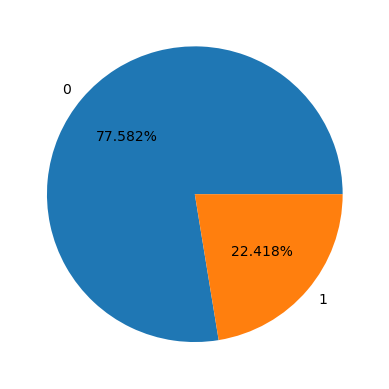

In [36]:
plt.pie(t, labels=labels, autopct='%1.3f%%')
plt.show()

Given the observed imbalance in our dataset, we will employ undersampling techniques to achieve balance. This approach is particularly suitable considering the substantial size of our dataset.

## Undersampling 

In [37]:
import seaborn as sns

In [38]:
minority_class_len= len(df_new[df_new["RainTomorrow"] == 1])
print(minority_class_len)

31877


In [39]:
majority_class_len= len(df_new[df_new["RainTomorrow"] == 0])
print(majority_class_len)

110316


In [40]:
majority_class_indices= df_new[df_new["RainTomorrow"] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 9,     13,
            ...
            145449, 145450, 145451, 145452, 145453, 145454, 145455, 145456,
            145457, 145458],
           dtype='int64', length=110316)


In [41]:
random_majority_indices = np.random.choice(majority_class_indices,
                                          minority_class_len,
                                          replace=False)

print(len(random_majority_indices))

31877


In [42]:
minority_class_indices= df_new[df_new["RainTomorrow"] == 1].index
print(minority_class_indices)

Int64Index([     8,     10,     11,     12,     16,     17,     28,     52,
                73,     99,
            ...
            145306, 145309, 145316, 145320, 145321, 145324, 145390, 145391,
            145392, 145393],
           dtype='int64', length=31877)


In [43]:
 under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [44]:
under_sample = df_new.loc[under_sample_indices]

<Axes: xlabel='RainTomorrow', ylabel='count'>

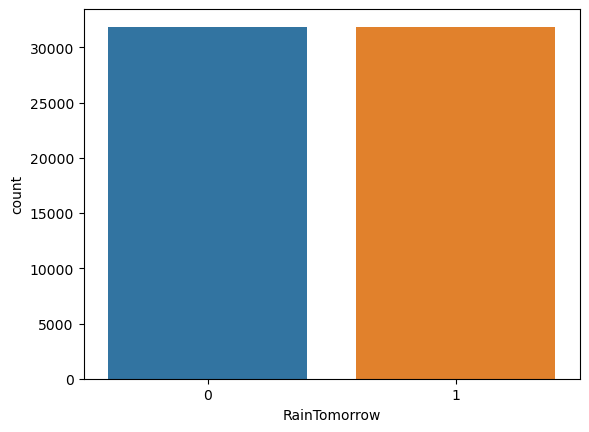

In [45]:
sns.countplot(x="RainTomorrow", data= under_sample)

In [46]:
print(under_sample.shape)

(63754, 23)


Upon implementing undersampling, we have achieved an equal distribution of the categories "No" (0) and "Yes" (1), each with a count of 31,877. This results in a balanced dataset comprising 63,754 rows and 23 columns, which is a substantial size for our analysis.

In [47]:
under_sample.drop(columns=["Sunshine", "Evaporation"], inplace=True)

In [48]:
under_sample.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Month',
       'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

## Taking X as independent variable and y as dependent variable

In [49]:
y= under_sample['RainTomorrow']
x= under_sample.drop('RainTomorrow', axis=1)
print(x.shape)
print(y.shape)

(63754, 20)
(63754,)


In [50]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,12,27,114,23,14,0
10,13.4,30.4,0.0,30.0,17.0,6.0,48.0,22.0,1011.8,1008.7,5.0,5.0,20.4,28.8,12,27,1,223,323,0
11,15.9,21.7,2.2,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,12,27,113,13,313,1
12,15.9,18.6,15.6,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,12,27,4,114,114,1
16,14.1,20.9,0.0,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,12,27,313,224,3,0


In [51]:
y.head()

8     1
10    1
11    1
12    1
16    1
Name: RainTomorrow, dtype: int64

In [52]:
y.value_counts()

1    31877
0    31877
Name: RainTomorrow, dtype: int64

In [53]:
x.shape

(63754, 20)

In [54]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,12,27,114,23,14,0
10,13.4,30.4,0.0,30.0,17.0,6.0,48.0,22.0,1011.8,1008.7,5.0,5.0,20.4,28.8,12,27,1,223,323,0
11,15.9,21.7,2.2,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,12,27,113,13,313,1
12,15.9,18.6,15.6,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,12,27,4,114,114,1
16,14.1,20.9,0.0,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,12,27,313,224,3,0


In [55]:
y.value_counts()

1    31877
0    31877
Name: RainTomorrow, dtype: int64

## Splitting DATA 

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42715, 20)
(21039, 20)
(42715,)
(21039,)


## Importing confusion matrix and classification report 

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred, zero_division=1))
def mscore(model):
    print('Train Score',model.score(x_train,y_train))
    print('Test Score',model.score(x_test,y_test))

## MODELING

### KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
m2 = KNeighborsClassifier(n_neighbors=15)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [62]:
mscore(m2)

Train Score 0.7891138944164813
Test Score 0.759684395646181


In [63]:
ypred_m2 = m2.predict(x_test)
eval_model(y_test,ypred_m2) 

[[8346 2187]
 [2869 7637]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     10533
           1       0.78      0.73      0.75     10506

    accuracy                           0.76     21039
   macro avg       0.76      0.76      0.76     21039
weighted avg       0.76      0.76      0.76     21039



### ROC Curve for KNN

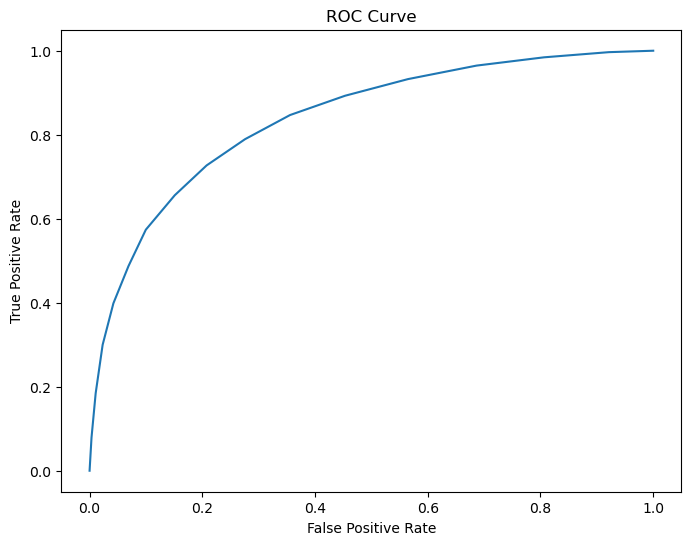

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = m2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Logistic Regression 

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a StandardScaler or MinMaxScaler object
scaler = StandardScaler()  # or MinMaxScaler()

# Fit the scaler on your training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Now, you can train your LightGBM model on the scaled data

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
m1 = LogisticRegression(max_iter=20000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=20000)

In [68]:
mscore(m1)

Train Score 0.7697061922041437
Test Score 0.7747991824706497


In [69]:
ypred_m1 = m1.predict(x_test)
eval_model(y_test,ypred_m1)

[[8304 2229]
 [2509 7997]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     10533
           1       0.78      0.76      0.77     10506

    accuracy                           0.77     21039
   macro avg       0.77      0.77      0.77     21039
weighted avg       0.77      0.77      0.77     21039



### ROC Curve for Logistic Regression 

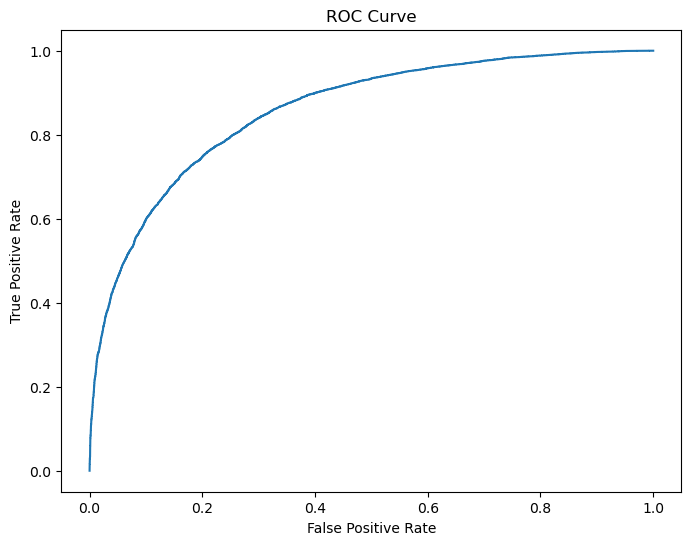

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = m1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## XG Boost 

In [71]:
import xgboost as xgb
params_xgb ={'n_estimators': 300,
            'max_depth': 13}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
mscore(model_xgb)
ypred_model_xgb = model_xgb.predict(x_test)
eval_model(y_test,ypred_model_xgb)

Train Score 0.999953178040501
Test Score 0.7969485241693997
[[8449 2084]
 [2188 8318]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     10533
           1       0.80      0.79      0.80     10506

    accuracy                           0.80     21039
   macro avg       0.80      0.80      0.80     21039
weighted avg       0.80      0.80      0.80     21039



### ROC Curve for XG BOOST 

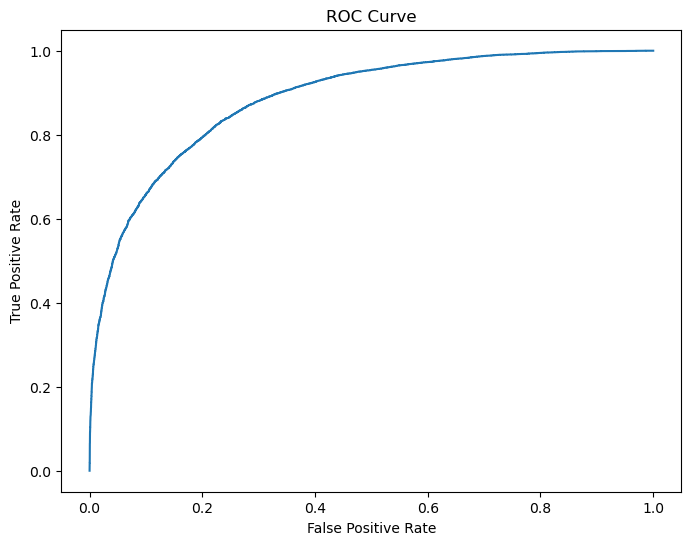

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model_xgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## LightGBM

In [74]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 21371, number of negative: 21344
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2256
[LightGBM] [Info] Number of data points in the train set: 42715, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500316 -> initscore=0.001264
[LightGBM] [Info] Start training from score 0.001264


LGBMClassifier(colsample_bytree=0.95, max_depth=16, min_split_gain=0.1,
               n_estimators=200, num_leaves=50, reg_alpha=1.2, reg_lambda=1.2,
               subsample=0.95, subsample_freq=20)

In [75]:
mscore(model_lgb)
ypred_model_lgb = model_lgb.predict(x_test)
eval_model(y_test,ypred_model_lgb)

Train Score 0.8662998946505911
Test Score 0.8026522173107087
[[8559 1974]
 [2178 8328]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     10533
           1       0.81      0.79      0.80     10506

    accuracy                           0.80     21039
   macro avg       0.80      0.80      0.80     21039
weighted avg       0.80      0.80      0.80     21039



### ROC Curve for LightbGBM Model

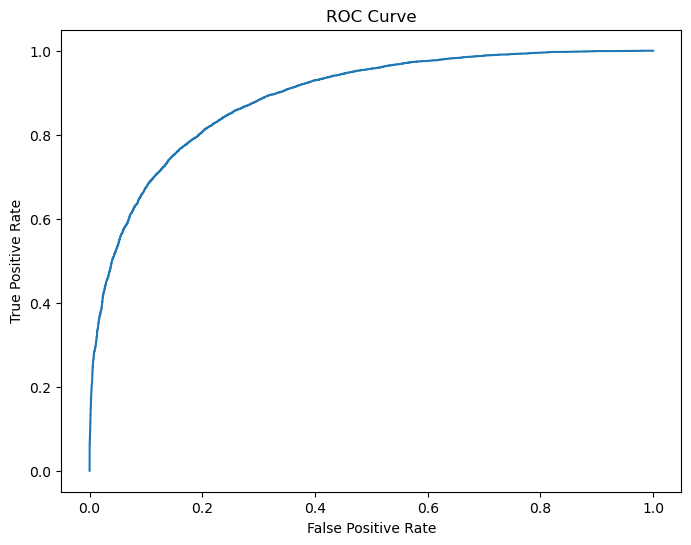

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model_lgb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Conclusion 

## Comparing all models through graphical representation

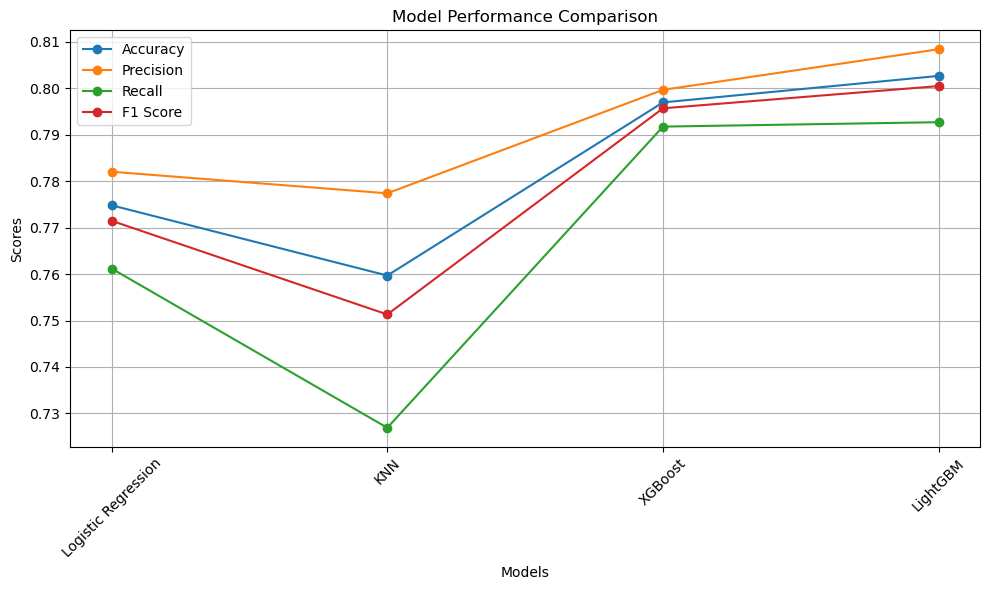

In [77]:
import matplotlib.pyplot as plt

# Define the models and their corresponding names
models = [m1, m2, model_xgb, model_lgb]
model_names = ["Logistic Regression", "KNN", "XGBoost", "LightGBM"]

# Create empty lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Calculate the performance metrics for each model
for model in models:
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create line graphs for performance metrics
plt.figure(figsize=(10, 6))

plt.plot(model_names, accuracy_scores, label="Accuracy", marker='o')
plt.plot(model_names, precision_scores, label="Precision", marker='o')
plt.plot(model_names, recall_scores, label="Recall", marker='o')
plt.plot(model_names, f1_scores, label="F1 Score", marker='o')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
import joblib

In [79]:
joblib.dump(model_lgb, 'model.pkl')

['model.pkl']

# END